In [22]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator

import pandas as pd


# Hyperparameters

In [25]:
loss_used = 'mean_squared_error'
metrics = ['accuracy']
batch_size=64
epochs = 10

# Saving locations

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

In [28]:
import os
if not os.path.exists(folder):
    os.makedirs(folder)

In [29]:
last_layer = pre_trained_model.get_layer('block5_conv3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output 

last layer output shape:  (None, 9, 9, 512)


In [30]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='linear')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = loss_used,
              metrics = metrics) 

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

# Loading the data

In [31]:

all_data_df = pd.read_csv('train_set.csv')
all_data_df_use = all_data_df[['img_path','ROS']]
train_df=all_data_df_use[all_data_df.img_path.notnull()]

result = pd.read_csv('test_set.csv')
test_df = result[['img_path','ROS']]

In [32]:
train_df

,img_path,ROS
0,/home/vigneshwar/sri/square_cropped_images/ima...,0.109929
1,/home/vigneshwar/sri/square_cropped_images/ima...,0.655773
2,/home/vigneshwar/sri/square_cropped_images/ima...,0.245059
3,/home/vigneshwar/sri/square_cropped_images/ima...,0.000000
4,/home/vigneshwar/sri/square_cropped_images/ima...,0.389480
5,/home/vigneshwar/sri/square_cropped_images/ima...,0.033828
6,/home/vigneshwar/sri/square_cropped_images/ima...,0.047089
7,/home/vigneshwar/sri/square_cropped_images/ima...,0.306019
8,/home/vigneshwar/sri/square_cropped_images/ima...,0.319010
9,/home/vigneshwar/sri/square_cropped_images/ima...,0.285231


# Generators

In [33]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.20,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="ROS",
            subset="training",
            batch_size=32,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(150,150))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="ROS",
            subset="validation",
            batch_size=32,
            seed=42,
            class_mode="other",
            target_size=(150,150))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(150,150))

Found 10902 images.
Found 2725 images.
Found 2617 images.


In [34]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [35]:
callbacks = myCallback()
history = model.fit_generator(train_generator,
                              validation_data=valid_generator,
                              epochs=epochs,
                              verbose=1,
                              callbacks=[callbacks])

Epoch 1/10
341/341 [==============================] - 1586s 5s/step - loss: 1.2512 - acc: 0.0085 - val_loss: 0.2069 - val_acc: 0.0011
Epoch 2/10
341/341 [==============================] - 1578s 5s/step - loss: 0.1871 - acc: 0.0072 - val_loss: 0.2088 - val_acc: 0.0022
Epoch 3/10
341/341 [==============================] - 1577s 5s/step - loss: 0.1840 - acc: 0.0083 - val_loss: 0.2014 - val_acc: 0.0000e+00
Epoch 4/10
341/341 [==============================] - 1580s 5s/step - loss: 0.1847 - acc: 0.0067 - val_loss: 0.1991 - val_acc: 0.0000e+00
Epoch 5/10
341/341 [==============================] - 1579s 5s/step - loss: 0.1821 - acc: 0.0078 - val_loss: 0.1965 - val_acc: 0.0000e+00
Epoch 6/10
341/341 [==============================] - 1575s 5s/step - loss: 0.1828 - acc: 0.0068 - val_loss: 0.2101 - val_acc: 3.6697e-04
Epoch 7/10
341/341 [==============================] - 1571s 5s/step - loss: 0.1816 - acc: 0.0069 - val_loss: 0.2030 - val_acc: 3.6697e-04
Epoch 8/10
341/341 [======================

# Saving and Ploting

In [36]:
model.save(model_name)

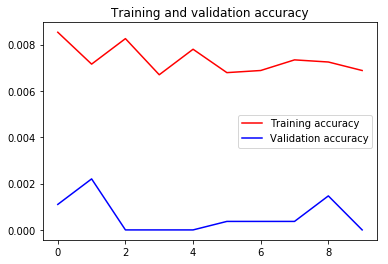

<Figure size 432x288 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig1 = plt.gcf()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig1.savefig(accuracy_plot)

plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

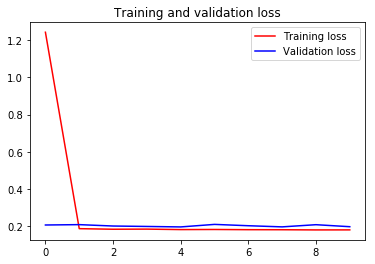

<Figure size 432x288 with 0 Axes>

In [89]:
fig1 = plt.gcf()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig(loss_plot)

plt.figure()
#plt.show()

In [43]:
scores = model.predict_generator(test_generator,verbose=1) 

41/41 [==============================] - 284s 7s/step


In [44]:
scores

array([[0.6285243 ],
       [0.5889201 ],
       [0.5647993 ],
       ...,
       [0.60544753],
       [0.4324256 ],
       [0.6397518 ]], dtype=float32)

In [47]:
result['Predicted'] = scores

In [48]:
result['Mape'] = abs( (result['ROS'] - result['Predicted'] ) / result['ROS']) * 100

In [50]:
result.to_csv(output_file)

In [52]:
MAPE = result[(result['Mape'] <= 100) & (result['Mape'] >= 0)]['Mape'].mean()

In [53]:
MAPE

34.47155357680085

In [54]:
import numpy as np
MAPE_RAW = result[~result.isin([np.nan, np.inf, -np.inf]).any(1)]['Mape'].mean()

In [55]:
MAPE_RAW

54.05876906315976

In [56]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = result['ROS'], y_pred = result['Predicted'])
RMSE = MSE**(0.5)

In [57]:
print(MSE)
print(MSE**(0.5))

0.18827737825725016
0.4339094125013309


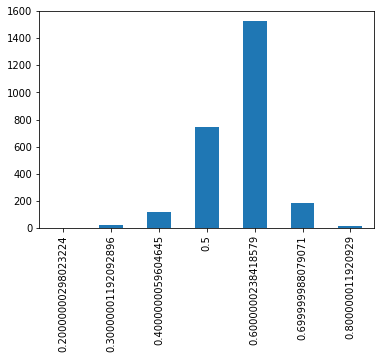

In [93]:
fig1 = plt.gcf()
pd.value_counts(result['Predicted'].round(1)).sort_index().plot(kind="bar")
fig1.savefig(ROS_pred)
